In this project, linear regression was performed with Gaussian processes. Besides the use of new equations for the Gaussian process, this implementation is similar to project 2. Equation 6.23 is used to compute the Gaussian kernel. This kernel is used in equation 6.62 to build the covariance matrix. Instead of using equations 3.58 and 3.59 as the update equations, equations 6.66 and 6.67 are used, which are the key results that define regression using a Gaussian process. The kernel and covariance computed are used in these new update equations. Using the results from equations 6.66 and 6.67, linear regression is performed and the resulting plots are displayed. As the number of observations increased, the plot appears to converge to the true curve being estimated. Based on the plots from this project and project 2, it appears that the Gaussian process performs worse than the method used in project 2.


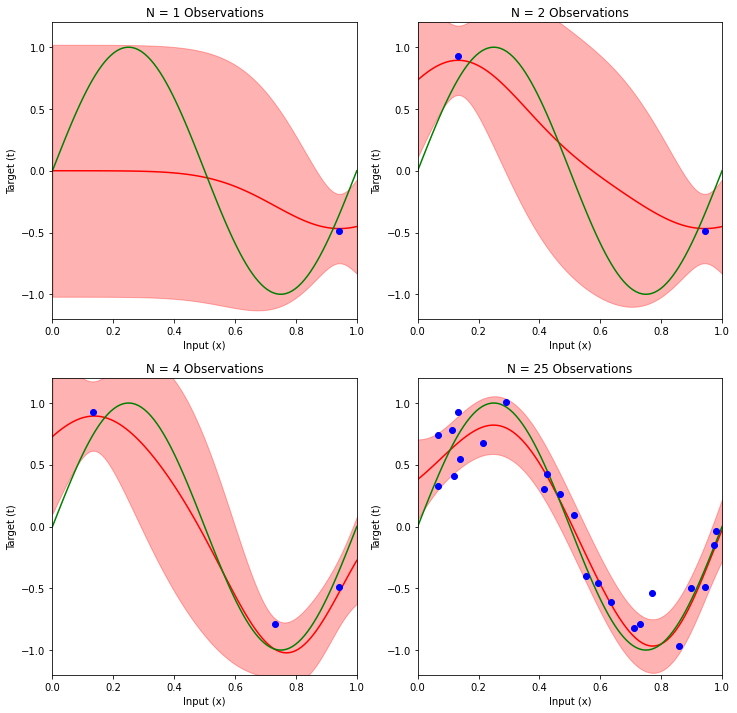

In [ ]:
#Project 4 | Gaussian Processes
#Layth Yassin and Husam Almanakly

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#Set up subplots and sizing
figure, axarr = plt.subplots(nrows = 2, ncols = 2)
figure.set_figheight(12)
figure.set_figwidth(12)

#MEAN IS RED LINE IN FIG3.8  - > just plotting the mean as a function of x 
#Set up number of observations and parameter values
N = 25
alpha = 2
beta = 25.0

#Generate data 
noise = np.random.normal(0, np.sqrt(1/beta), N)
x = np.random.uniform(0,1,N)
t = np.sin(2*np.pi*x) + noise

sigma = 0.15
delta_nm = 1
N = 1

#Kernal Function - Equation 6.23
def kernel(x, x_prime):
    k = np.exp((-np.absolute(x - x_prime)**2)/(2*sigma)**2)
    return k

def meanPlot(x, t, N, ax):
    x = np.atleast_2d(x)
    t = np.atleast_2d(t).T

    #Fill Covariance matrix using eq 6.62
    CN = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            k = kernel(x[:,i], x[:,j])
            if(i==j):
                CN[i,j] = k + 1/beta*delta_nm
            else:
                CN[i,j] = k
                    

    # k_prime = kernel(x, x) # always 1 anyways
    c = 1 + 1/beta
    
    #Kernal Equation - 6.23
    x_prime = np.linspace(0,1,100)
    k = kernel(x.T, x_prime)
    k = np.atleast_2d(k)
    
    #Kernal Update Equations - 6.66 and 6.67
    mN = k.T@np.linalg.inv(CN)@t
    sigN = np.sqrt(np.atleast_2d(c - np.diag(k.T@np.linalg.inv(CN)@k)))

    #Find boundary lines for shaded region
    mN = mN.flatten()
    sigN = sigN.flatten()
    shadedUp = mN + sigN.T
    shadedDown = mN - sigN.T

    ax.fill_between(x_prime, shadedUp, shadedDown, alpha=0.3, interpolate = True, color = 'red')
    ax.set_xlim(-0,1)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel('Input (x)')
    ax.set_ylabel('Target (t)')
    ax.set_title(f'N = {N} Observations')

    ax.plot(x_prime, mN, color = 'red')
    true = np.sin(2*np.pi*x_prime)
    ax.plot(x_prime,true, color = 'green')

    #Plot observation points
    x = x.flatten()
    t = t.flatten()
    if (N ==1): 
        ax.plot(x,t, 'o', color='blue')
        return mN
    for i in range(0,N):
        ax.plot(x[i], t[i], 'o', color='blue')
    return mN

m1 = meanPlot(x[0],t[0], 1, axarr[0,0])
m2 = meanPlot(x[:2],t[:2], 2, axarr[0,1])
m4 = meanPlot(x[:4],t[:4], 4, axarr[1,0])
m25 = meanPlot(x[:25],t[:25], 25, axarr[1,1])

plt.show()